In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
class NeuralNetwork:
    def __init__(self, X, y, batch = 64, lr = 1e-3,  epochs = 50):
        self.x = X 
        self.y = y
        self.batch = batch
        self.epochs = epochs
        self.lr = lr

        self.loss = []
        self.acc = []
        
        self.init_weights()
      
    def init_weights(self):
        self.W1 = np.random.randn(self.x.shape[1], self.y.shape[1])
        self.b1 = np.random.randn(self.W1.shape[1],)

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def shuffle(self):
        idx = [i for i in range(self.x.shape[0])]
        np.random.shuffle(idx)
        self.x = self.x[idx]
        self.y = self.y[idx]
        
    def feedforward(self):
        
        assert self.x.shape[1] == self.W1.shape[0]
        
        self.z1 = self.x.dot(self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        delta = (self.a1 - self.y) * self.a1 * (1.0 - self.a1)

        DW1 = self.x.T.dot(delta)
        db1 = delta.sum(axis=0)
       
        self.W1 -= self.lr * DW1
        self.b1 -= self.lr * db1
        
        self.error = self.y - self.a1

    
    def train(self):
        for epoch in range(self.epochs):
            l = 0
            acc = 0
            self.shuffle()
            self.feedforward()
            l+=np.mean(self.error**2)
            acc+= np.count_nonzero(np.argmax(self.a1,axis=1) == np.argmax(self.y,axis=1))
                
            self.loss.append(l/(self.x.shape[0]))
            self.acc.append(acc*100/(self.x.shape[0]))
            
    def plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
    
    def acc_plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.acc)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        
    def test(self,xtest,ytest):
        self.x = xtest
        self.y = ytest
        self.feedforward()
        acc = np.count_nonzero(np.argmax(self.a1,axis=1) == np.argmax(self.y,axis=1)) / self.x.shape[0]
        print("Accuracy:", 100 * acc, "%")
        

In [3]:
def load_data(dir_name):
    data = list() # init a list called `data`
    
    with open(dir_name,"r") as f: # open the directory as a read ("r"), call it `f`
        for line in f: # iterate through each `line` in `f`
            split_line = np.array(line.split(',')) # split lines by `,` - cast the resultant list into an numpy array
            split_line = split_line.astype(np.float32) # make the numpy array of str into floats
            data.append(split_line) # collect the sample into the `data` list
            
    data = np.asarray(data) # convert the `data` list into a numpy array for easier indexing
    
    # as the first number in each sample is the label (0-9), extract that from the rest and return both (X,Y)
    return data[:,1:],data[:,0]

In [4]:
X_train,Y_train = load_data("C:/Users/FlaviaMihaela/Downloads/MNIST/mnist_train.csv")
X_test,Y_test = load_data("C:/Users/FlaviaMihaela/Downloads/MNIST/mnist_test.csv")

In [5]:
# rescale data between 0 - 1.0
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

print(Y_train.shape)
print(Y_test.shape)

# one-hot encode train (y_train) and test (y_test) set labels
y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
y_train[np.arange(Y_train.size),Y_train.astype(int)] = 1.0

y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
y_test[np.arange(Y_test.size),Y_test.astype(int)] = 1.0

(60000,)
(10000,)


In [6]:
print("The shape of the training set feature matrix is:", X_train.shape)
print("The shape of the training label vector is:", y_train.shape)
print("The shape of the training set feature matrix is:", X_test.shape)
print("The shape of the training label vector is:", y_test.shape)

The shape of the training set feature matrix is: (60000, 784)
The shape of the training label vector is: (60000, 10)
The shape of the training set feature matrix is: (10000, 784)
The shape of the training label vector is: (10000, 10)


Accuracy: 86.41 %


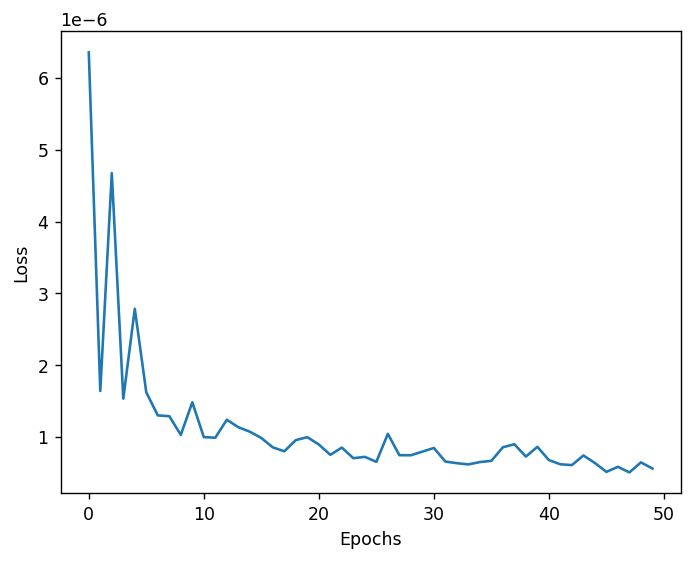

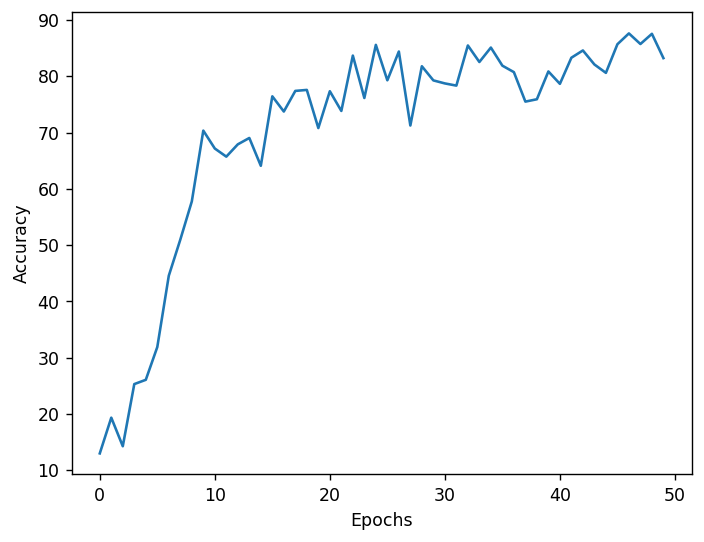

In [7]:
NN = NeuralNetwork(X_train, y_train) 
NN.train()
NN.plot()
NN.test(X_test,y_test)
NN.acc_plot()